# Access detailed transaction history

**The main objective** in this application is to generate data as realistic as possible for testing purposes and to define concept ideas for future application development and visualization of financial transactions of international service providers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import seed, randrange, uniform
from datetime import date, datetime, time, timedelta
import squarify 

## Plaid random dataset (version 1)
- Trying to generate randomly dataset keeping the structure and fields from **Transactions data** withing https://plaid.com/docs/transactions/
- Based on information available on: https://plaid.com/docs/transactions/ and a simulator posted in: https://plaid.com/products/transactions/

We have several fields generated from the API:
- **authority**:
    - "account_id": "vokyE5Rn6vHKqDLRXEn5fne7LwbKPLIXGK98d",
- **ammount**: Settled value in specified currency. Debits are positive; credits are negative
    - "amount": 2307.21,
    - "iso_currency_code": "USD",
    - "unofficial_currency_code"
- **category**: See a list of all transactions categories by posting to the /cathegories/get endpoint
    - "category": "Shops", "Computers and Electronics"
    - "category_id": "19013000",
- **date**: For pending transactions, the date the transaction occurred is returned
    - "date": "2017-01-29",
    - "authorized_date": "2017-01-27",
- **location**: include address, city, state/region/zip/postal code, as well as latitude and longitude
    - "address": "300 Post St",
    - "city": "San Francisco",
    - "region": "CA",
    - "postal_code": "94108",
    - "country": "US",
    - "lat": null,
    - "lon": null,
    - "store_number": "1235"
- **name**: the merchant name or transaction description
    - "name": "Apple Store",
- **payment_meta**:
    - "by_order_of": null,
    - "payee": null,
    - "payer": null,
    - "payment_method": null,
    - "payment_processor": null,
    - "ppd_id": null,
    - "reason": null,
    - "reference_number": null
    - "payment_channel": "in store",
    - "pending": false,
    - "pending_transaction_id": null,
    - "account_owner": null,
    - "transaction_id": "lPNjeW1nR6CDn5okmGQ6hEpMo4lLNoSrzqDje",
    - "transaction_code": null,
    - "transaction_type": "place"
    
#### 32 fields!!!!

So, with this information we are want to generate a simulated data according with the API specifications

In [2]:
# Some imputs to generate random data
#Latitudes and longitudes for places
latlon=[38.50,-98.00] # Center of Kansas City, USA
lat_lims=[36.933762,40.249847] # Limits of the latitude's state
lon_lims=[-102.290409,-94.500683] # Limits of the longitude's state
# Amount from a range
amount_range=[-20000,20000] 
# Generating cateories from google categories of service and market
taxo=pd.read_csv("taxonomy_google.csv",delimiter=">",skiprows=1,names=range(8))
categories=taxo[1]

In [3]:
categories_uniques=list(set(categories.dropna()))
categories_ids=np.arange(19013000,19013000+len(categories_uniques))

In [4]:
print(len(categories_uniques), len(categories_ids))
# using dictionary comprehension to convert lists to dictionary
dict_cat = {categories_uniques[i]: categories_ids[i] for i in range(len(categories_uniques))}

332 332


In [5]:
print("We have {} categories".format(len(categories_uniques)))
print("Uniques categories:",categories_uniques[0:5])

We have 332 categories
Uniques categories: [' Household Supplies ', ' Science & Laboratory', ' Video Game Console Accessories', ' Fireplace & Wood Stove Accessories ', ' Handbags, Wallets & Cases']


In [6]:
#Generating dates
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2020-12-11')
def random_dates(start, end, n=10):
    start_u = start.value//10**9
    end_u = end.value//10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')
#Date=random_dates(start, end)

We want generate a simulated data with N=5000 transactions

In [7]:
# Defining a new dataset empty
data_sim=pd.DataFrame()

In [8]:
N = 5000
#mu1,mu2=5000.0,-4000.0
#sigma1,sigma2=2000.0,1500.0
mu1,mu2,mu3=np.random.randint(1000,5000),np.random.randint(-2000,-500),np.random.randint(5000,15000)
sigma1,sigma2,sigma3=np.random.randint(1000,5000)*0.3,np.random.randint(-2000,-500)*0.3,np.random.randint(5000,15000)*0.3

amount_p = np.random.randn(N//2) * sigma1 + mu1
amount_m = np.random.randn(N//2) * sigma2 + mu2
amount=np.concatenate((amount_p,amount_m))
random.shuffle(amount)
data_sim["amount"]=amount

data_sim["category"] = np.random.choice(categories_uniques, size=N)
# Remap the values of the categories dataframe
data_sim["category_id"] = data_sim["category"].replace(dict_cat)
data_sim["date"]=random_dates(start, end, N)
timeDelta = timedelta(days = uniform(0, 4))
data_sim["authorized_date"]=data_sim["date"]+timeDelta
data_sim["lat"] = np.random.choice(np.arange(lat_lims[0],lat_lims[1],0.01), size=N)
data_sim["lon"] = np.random.choice(np.arange(lon_lims[0],lon_lims[1],0.01), size=N)
cities_kansas=pd.read_csv("kansas_cities.csv",delimiter=",",header=None)
cities_kansas2=pd.read_csv("kansas_cities2.csv",delimiter=",",header=0)
dict_cities = {cities_kansas2["City"][i]: cities_kansas2["Postal Code"][i] for i in range(len(cities_kansas2))}

data_sim["city"]=np.random.choice(cities_kansas2["City"], size=N)
data_sim["postal_code"] = data_sim["city"].replace(dict_cities)

data_sim["region"]="KS"
data_sim["country"]="US"

In [9]:
data_sim

,amount,category,category_id,date,authorized_date,lat,lon,city,postal_code,region,country
0,-1955.392328,Circuit Boards & Components,19013071,2020-12-05 15:46:22,2020-12-05 23:41:41.523290,39.463762,-101.270409,Mound Valley,67354,KS,US
1,1433.750648,Storage Tanks,19013259,2020-08-21 00:16:24,2020-08-21 08:11:43.523290,39.923762,-100.470409,Fairview,66425,KS,US
2,1134.903259,Office Furniture,19013322,2020-11-11 06:34:59,2020-11-11 14:30:18.523290,39.203762,-96.030409,Udall,67146,KS,US
3,-1075.586694,Erotic,19013105,2020-08-21 11:51:41,2020-08-21 19:47:00.523290,40.243762,-101.700409,Windom,67491,KS,US
4,1242.647770,Table Accessories,19013096,2020-04-19 15:14:33,2020-04-19 23:09:52.523290,38.263762,-101.320409,Montezuma,67867,KS,US
...,...,...,...,...,...,...,...,...,...,...,...
4995,1766.566302,"Handbags, Wallets & Cases",19013004,2020-09-24 09:41:42,2020-09-24 17:37:01.523290,39.283762,-99.270409,Mayetta,66509,KS,US
4996,-746.068830,Plumbing,19013148,2020-04-10 20:38:24,2020-04-11 04:33:43.523290,38.503762,-102.190409,Claflin,67525,KS,US
4997,429.697912,Photography,19013146,2020-08-11 16:09:16,2020-08-12 00:04:35.523290,39.623762,-98.890409,Blue Rapids,66411,KS,US
4998,1099.995525,Product Manuals,19013129,2020-02-08 12:02:23,2020-02-08 19:57:42.523290,40.233762,-95.940409,Powhattan,66527,KS,US


Additionaly, we will try generate an another data related with clients and companies into the application:

In [10]:
name=["company1","company2","company3","company4","company5","company6"]
city=['Shawnee Mission', 'Bazine', 'Ellis', 'Rock', 'Leonardville', 'Minneapolis']#np.random.choice(cities_kansas2["City"], size=len(name))
lat_city=[39.0228,38.4445,40.6995,39.3722,39.3644,44.9778]
lon_city=[-94.7152,-99.6921,-74.0396,-104.8561,-96.8589,-93.2650]
state="KS"
data_sim["Name"]=np.random.choice(name, size=N)
dict_names = {name[i]: city[i] for i in range(len(name))}
dict_lat = {city[i]: lat_city[i] for i in range(len(name))}
dict_lon = {city[i]: lon_city[i] for i in range(len(name))}
data_sim["Contrator_city"] = data_sim["Name"].replace(dict_names)
data_sim["Contrator_lat"] = data_sim["Name"].replace(dict_lat)
data_sim["Contrator_lon"] = data_sim["Name"].replace(dict_lon)
data_sim["Zipcode"] = data_sim["Contrator_city"].replace(dict_cities)
company_Type=["sub_contractor","general_contractor","sub_contractor","sub_contractor","general_contractor","general_contractor"]
state_annual_revenue=[12578.75,45897.89,23987.76,33767.86,19765.23,29674.99]

dict_revenue = {name[i]: state_annual_revenue[i] for i in range(len(name))}
dict_company_Type = {name[i]: company_Type[i] for i in range(len(name))}
data_sim["Company_Type"] = data_sim["Name"].replace(dict_company_Type)
contractor_type=["drywall","electrical","excavation","foundations","framing","hvac","other_non_tech","other_tech","painting","plumbing","roofing"]
data_sim["Contractor_type"] = np.random.choice(contractor_type, size=N)

In [11]:
dict_lat.get(dict_names.get("company4"))

39.3722

In [12]:
data_sim=data_sim.sort_values(by="date")
#set column as index
data_sim = data_sim.set_index('date')
data_sim.head(10)

,amount,category,category_id,authorized_date,lat,lon,city,postal_code,region,country,Name,Contrator_city,Contrator_lat,Contrator_lon,Zipcode,Company_Type,Contractor_type
date,,,,,,,,,,,,,,,,,
2020-01-01 00:07:09,1347.436683,GPS Accessories,19013022,2020-01-01 08:02:28.523290,38.723762,-98.640409,Neodesha,66757,KS,US,company2,Bazine,company2,company2,67516,general_contractor,roofing
2020-01-01 03:35:19,-1093.422412,"Handbags, Wallets & Cases",19013004,2020-01-01 11:30:38.523290,38.333762,-99.570409,Pawnee Rock,67567,KS,US,company2,Bazine,company2,company2,67516,general_contractor,hvac
2020-01-01 03:48:56,1679.327777,Food Service,19013174,2020-01-01 11:44:15.523290,38.463762,-97.330409,Cherokee,66724,KS,US,company6,Minneapolis,company6,company6,67467,general_contractor,painting
2020-01-01 06:39:18,-1186.954972,Bathroom Accessories,19013227,2020-01-01 14:34:37.523290,38.663762,-97.890409,Coats,67028,KS,US,company2,Bazine,company2,company2,67516,general_contractor,painting
2020-01-01 08:59:12,1396.893893,Bathroom Accessories,19013227,2020-01-01 16:54:31.523290,38.483762,-97.280409,Kingman,67068,KS,US,company4,Rock,company4,company4,67131,sub_contractor,framing
2020-01-01 09:58:34,-1257.807172,Toys,19013041,2020-01-01 17:53:53.523290,38.653762,-102.140409,Munden,66959,KS,US,company5,Leonardville,company5,company5,66449,general_contractor,roofing
2020-01-01 10:32:19,2246.917092,Audio,19013010,2020-01-01 18:27:38.523290,38.983762,-98.680409,Elk City,67344,KS,US,company6,Minneapolis,company6,company6,67467,general_contractor,roofing
2020-01-01 10:38:50,1865.203107,Lighting Accessories,19013053,2020-01-01 18:34:09.523290,37.973762,-97.270409,Arkansas City,67005,KS,US,company4,Rock,company4,company4,67131,sub_contractor,framing
2020-01-01 13:18:14,-1636.114284,Cosmetic & Toiletry Bags,19013253,2020-01-01 21:13:33.523290,39.373762,-97.460409,Manhattan,66506,KS,US,company5,Leonardville,company5,company5,66449,general_contractor,foundations


# Some Visualizations ideas

In [13]:
def plot1(resam="D",startdate="2020-01-01",enddate="2020-12-31"):
    data=data_sim[["amount"]]
    #data=data_sim[(data_sim.index>=startdate)&(data_sim.index<=enddate)]
    data=data[(data.index>=startdate)&(data.index<=enddate)]
    data=data.resample(resam).sum()

    plt.figure(figsize=(20,6))
    bins=100
    inf=plt.hist(data[data["amount"]>0]["amount"],bins=bins,color='g',alpha=0.5,label="Inflows (Average={})".format(np.round(data[data["amount"]>0]["amount"].mean(),2)))
    plt.vlines(data[data["amount"]>0]["amount"].mean(),inf[0].min(),inf[0].max(),color='g',linestyle='--',lw=4)
    out=plt.hist(data[data["amount"]<0]["amount"],bins=bins,color='r',alpha=0.5,label="Outflows (Average={})".format(np.round(data[data["amount"]<0]["amount"].mean(),2)))
    plt.vlines(data[data["amount"]<0]["amount"].mean(),out[0].min(),out[0].max(),color='r',linestyle='--',lw=4)
    plt.plot([], [], ' ', label="Average balance on period is {}".format(np.round(data[data["amount"]>0]["amount"].mean()+data[data["amount"]<0]["amount"].mean()),2))
    plt.xlabel("Amount")
    plt.ylabel("number of transactions")
    plt.legend(title="Period from {} to {}".format(data.index.min(),data.index.max()),ncol=1,loc=2)
    return plt.show()

In [14]:
def plot2(resam="D",startdate="2020-01-01",enddate="2020-12-31",kind="V"):
    # =========================================================================
    # If kind==V -> Volume trasactions 
    # If kind==B -> Balance trasactions
    # Example by Resample: "D":day, "5D":five days, "W":weekly, "M":monthly
    # =========================================================================
    data=data_sim[["amount"]]
    #data=data_sim[(data_sim.index>=startdate)&(data_sim.index<=enddate)]
    data=data[(data.index>=startdate)&(data.index<=enddate)]
    data1=data.resample(resam).sum()
    data2=data.resample(resam).size()
    if kind=="B":
        data=data1
        plt.figure(figsize=(20,6))
        data['positive'] = data['amount'] > 0
        data["amount"].plot(kind="bar",color=data.positive.map({True: 'g', False: 'r'}),alpha=0.5)
        plt.axhline(y=0., color='k', linestyle='-')
        plt.xlabel(None)
        plt.ylabel("Amount balance")
        plt.legend(title="Period from {} to {}".format(data.index.min(),data.index.max()),ncol=1)
    if kind=="V":
        data=data2
        plt.figure(figsize=(20,6))
        data.plot(kind="bar",color='b',alpha=0.5)
        plt.xlabel(None)
        plt.ylabel("Volume transactions")
        plt.legend(title="Period from {} to {}".format(data.index.min(),data.index.max()),ncol=1)
    
    return plt.show()

In [15]:
def plot3(startdate="2020-01-01",enddate="2020-12-31"):
    data=data_sim[(data_sim.index>=startdate)&(data_sim.index<=enddate)]
    data_p=data[data["amount"]>0]
    data_n=data[data["amount"]<0]
    cats_p=pd.DataFrame(np.unique(data_p["category"],return_counts=True)).T
    cats_p=cats_p.sort_values(by=1,ascending=False)[0:10]
    cats_n=pd.DataFrame(np.unique(data_n["category"],return_counts=True)).T
    cats_n=cats_n.sort_values(by=1,ascending=False)[0:10]
    plt.figure(figsize=(25,6))
    plt.subplot(121)
    squarify.plot(sizes=cats_p[1], label=cats_p[0], value=cats_p[1], alpha=0.5)
    plt.set_cmap("jet_r") 
    plt.title("Top 10 most commont categories (Volume inflow) Over period from {} to {}".format(startdate,enddate))
    plt.axis('off')
    plt.subplot(122)
    squarify.plot(sizes=cats_n[1], label=cats_n[0], value=cats_n[1], alpha=0.5)
    plt.set_cmap("jet_r") 
    plt.title("Top 10 most commont categories (Volume outflow) Over period from {} to {}".format(startdate,enddate))
    plt.axis('off')
    return plt.show()

In [16]:
def plot4(startdate="2020-01-01",enddate="2020-12-31"):
    data=data_sim[(data_sim.index>=startdate)&(data_sim.index<=enddate)]
#    data_p=data[data["amount"]>0]
#    data_n=data[data["amount"]<0]
    a = data.groupby('category')[['amount']].sum().index.get_level_values(0)#.tolist()
    d = data.groupby('category')[['amount']].sum().reset_index().amount.values#.tolist()
    cats=pd.DataFrame(np.array([a,d]).T)
    cats[1]=cats[1].apply(lambda x: round(x, 2))
    cats_p=cats[cats[1]>0]
    cats_n=cats[cats[1]<0]
    
    cats_p=cats_p.sort_values(by=1)[0:10]
    cats_n=cats_n.sort_values(by=1)[0:10]
    
    plt.figure(figsize=(25,6))
    plt.subplot(121)
    squarify.plot(sizes=cats_p[1], label=cats_p[0], value=cats_p[1], alpha=0.5)
    plt.set_cmap("jet_r") 
    plt.title("Top 10 most commont categories (Amount inflow) Over period from {} to {}".format(startdate,enddate))
    plt.axis('off')
    plt.subplot(122)
    squarify.plot(sizes=cats_n[1], label=cats_n[0], value=cats_n[1], alpha=0.5)
    plt.set_cmap("jet_r") 
    plt.title("Top 10 most commont categories (Amount outflow) Over period from {} to {}".format(startdate,enddate))
    plt.axis('off')
    return plt.show()

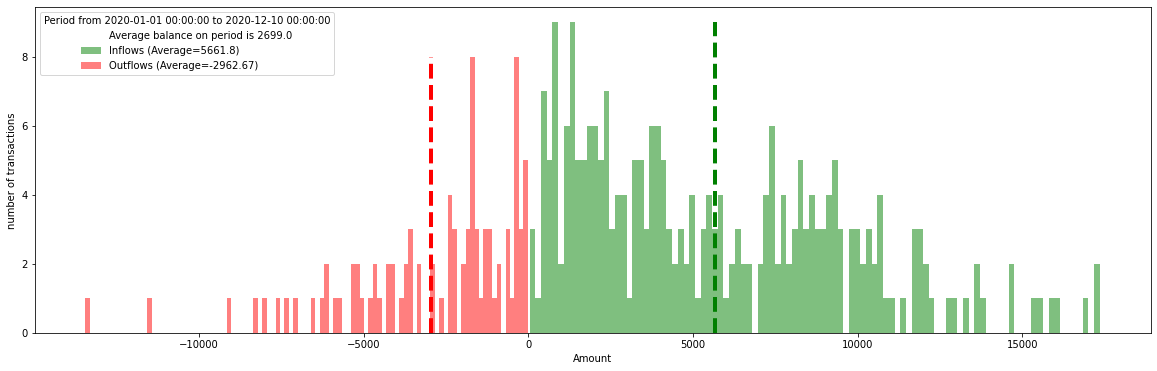

In [17]:
plot1(resam="D",startdate="2020-01-01",enddate="2020-12-31")

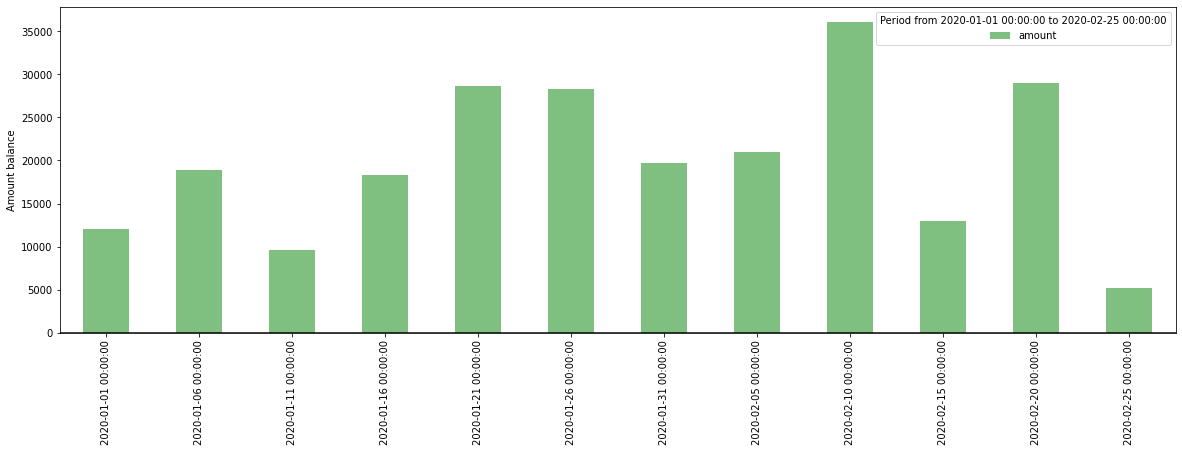

In [18]:
plot2(resam="5D",startdate="2020-01-01",enddate="2020-02-27",kind="B")

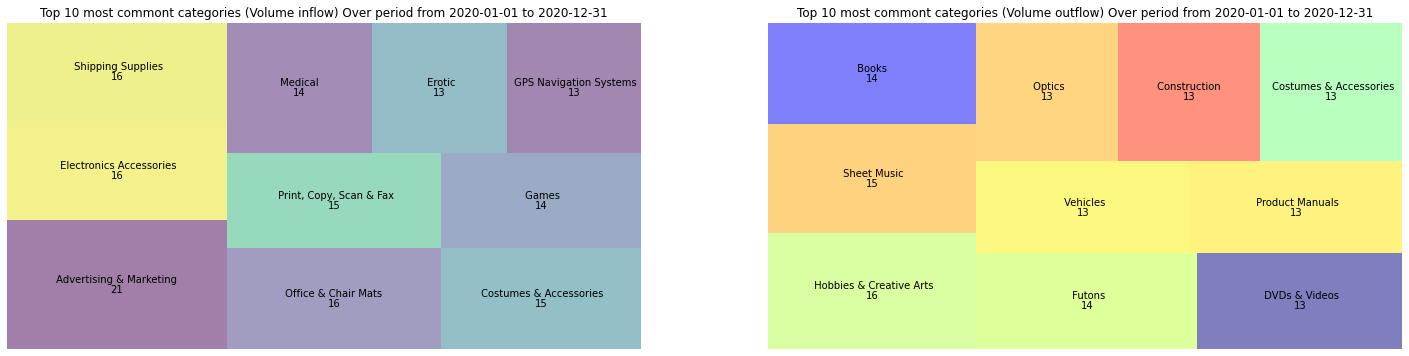

In [19]:
plot3(startdate="2020-01-01",enddate="2020-12-31")

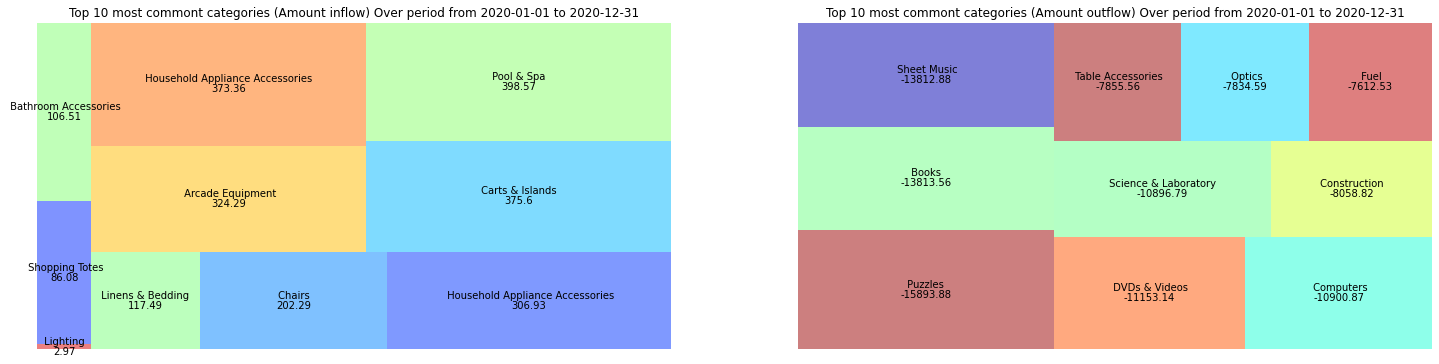

In [20]:
plot4(startdate="2020-01-01",enddate="2020-12-31")

In [21]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import branca
import branca.colormap as cm
from mpl_toolkits.basemap import Basemap
#from folium.plugins import BeautifyIcon
from folium.features import DivIcon
from pyvirtualdisplay import Display 
from selenium import webdriver

In [22]:
def plot5(startdate="2020-01-01",enddate="2020-12-31",company="company1"):
    data=data_sim[["amount","lat","lon"]]
    data=data_sim[(data_sim.index>=startdate)&(data_sim.index<=enddate)]
    
    #data=data.resample(resam).sum()
    data_p=data[data["amount"]>0]
    data_p=data_p.sort_values(by="amount")
    data_n=data[data["amount"]<0]
    data_n=data_n.sort_values(by="amount")
    locations_p = data_p[['lat', 'lon']]
    locationlist_p = locations_p.values.tolist()
    locations_n = data_n[['lat', 'lon']]
    locationlist_n = locations_n.values.tolist()
    locations = data[['lat', 'lon']]
    locationlist = locations.values.tolist()
    
    lat,lon=dict_lat.get(dict_names.get(company)), dict_lon.get(dict_names.get(company))
    locations_company = [lat, lon]
    locationlist_company = list(locations_company)
    
    map = folium.Map(width=800,height=800,location=[locations_p["lat"].mean()+0.015, locations_p["lon"].mean()-0.01], zoom_start=8)#,

    folium.CircleMarker(locationlist_company,weight=5,radius=3,color="blue",alpha=0.9,popup="Company").add_to(map)
    folium.Marker(locationlist_company, icon=DivIcon(icon_size=(150,36), icon_anchor=(0,30), html='<div style="font-size: 15pt; color:blue">{}</div>'.format(str(company)))).add_to(map)
        
    for point1, name1 in enumerate(data_p["amount"][0:20]):
        folium.CircleMarker(locationlist_p[point1],weight=4,radius=2,color="green",alpha=0.9,popup=data_p["amount"][point1]).add_to(map)
        folium.Marker(locationlist_p[point1], icon=DivIcon(icon_size=(150,36), icon_anchor=(0,30), html='<div style="font-size: 12pt; color:black">{}</div>'.format(np.round(name1,2)))).add_to(map)
    for point2, name2 in enumerate(data_n["amount"][0:20]):
        folium.CircleMarker(locationlist_n[point2],weight=4,radius=2,color="red",alpha=0.9,popup=data_n["amount"][point2]).add_to(map)
        folium.Marker(locationlist_n[point2], icon=DivIcon(icon_size=(150,36), icon_anchor=(0,30), html='<div style="font-size: 12pt; color:black">{}</div>'.format(np.round(name2,2)))).add_to(map)
    #fn1='stations_bogota.html'
    #map.save(fn1)
    return map

In [23]:
plot5(startdate="2020-01-01",enddate="2020-01-15",company="company2")

**For example***: one could now know the financial performance of company 1 with respect to the total financial performance of all companies.

In [24]:
def plot11(resam="D",startdate="2020-01-01",enddate="2020-12-31",company="company1"):
    data=data_sim[["amount"]]
    data=data[(data.index>=startdate)&(data.index<=enddate)]
    data=data.resample(resam).sum()

    data2=data_sim[data_sim["Name"]==company][["amount"]]
    data2=data2[(data2.index>=startdate)&(data2.index<=enddate)]
    data2=data2.resample(resam).sum()

    plt.figure(figsize=(20,6))
    bins=100
    inf=plt.hist(data[data["amount"]>0]["amount"],bins=bins,color='g',alpha=0.5,label="Inflows (Average={})".format(np.round(data[data["amount"]>0]["amount"].mean(),2)))
    plt.vlines(data[data["amount"]>0]["amount"].mean(),inf[0].min(),inf[0].max(),color='g',linestyle='--',lw=4)
    plt.vlines(data2[data2["amount"]>0]["amount"].mean(),inf[0].min(),inf[0].max(),color='g',linestyle='-',lw=6)
    out=plt.hist(data[data["amount"]<0]["amount"],bins=bins,color='r',alpha=0.5,label="Outflows (Average={})".format(np.round(data[data["amount"]<0]["amount"].mean(),2)))
    plt.vlines(data[data["amount"]<0]["amount"].mean(),out[0].min(),out[0].max(),color='r',linestyle='--',lw=4)
    plt.vlines(data2[data2["amount"]<0]["amount"].mean(),out[0].min(),out[0].max(),color='r',linestyle='-',lw=6)
    plt.plot([], [], ' ', label="Average balance on period is {}".format(np.round(data[data["amount"]>0]["amount"].mean()+data[data["amount"]<0]["amount"].mean(),2)))
    
    plt.plot([], [], ' ', label="Average balance on period is {} ({})".format(np.round(data2[data2["amount"]>0]["amount"].mean()+data2[data2["amount"]<0]["amount"].mean(),2),company))
    
    plt.xlabel("Amount")
    plt.ylabel("number of transactions")
    plt.legend(title="Period from {} to {}".format(data.index.min(),data.index.max()),ncol=1,loc=2)
    return plt.show()

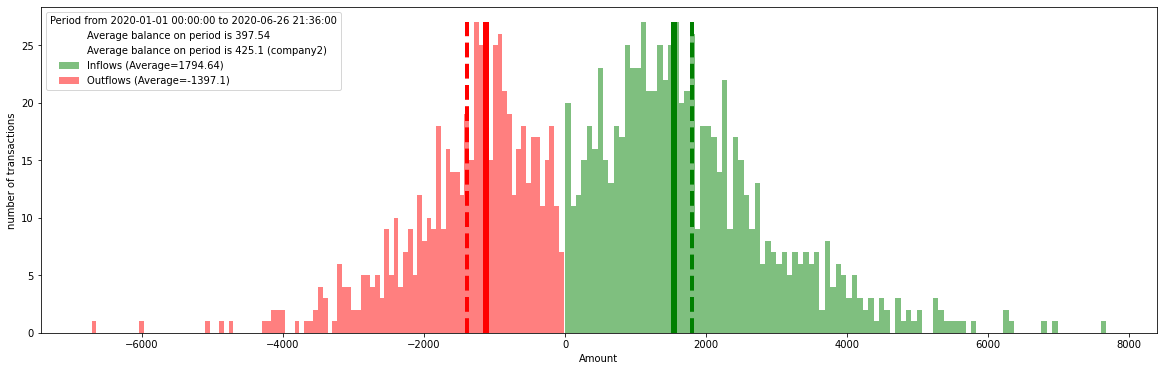

In [25]:
plot11(resam="0.1D",startdate="2020-01-01",enddate="2020-06-27",company="company2")